<a href="https://colab.research.google.com/github/RoMoRoToR/Article_on_pH_recognition/blob/master/working_with_phone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def generate_image(filename, min_dist, edge_threshold, centre_threshold, min_radius, max_radius):
    src = cv2.imread(cv2.samples.findFile(filename), cv2.IMREAD_COLOR)
    gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
    gray = cv2.medianBlur(gray, 5)
    circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, min_dist,
                              param1=edge_threshold, param2=centre_threshold,
                              minRadius=min_radius, maxRadius=max_radius)
    circle_coords = None
    if circles is not None:
        circles = np.uint16(np.around(circles))

        # Найти самый большой круг
        max_radius = 0
        for i in circles[0, :]:
            if i[2] > max_radius:
                max_radius = i[2]
                circle_coords = (i[0], i[1], i[2])

        # Нарисовать только центр круга
        if circle_coords is not None:
            center = (int(circle_coords[0]), int(circle_coords[1]))
            radius = int(circle_coords[2] * 0.2)  # Уменьшить радиус круга до 20% от оригинального
            cv2.circle(src, center, radius, (0, 100, 100), 3)

    text_loc = (100, 100)
    inverted_color = (int(255 - src[text_loc][0]), int(255 - src[text_loc][1]), int(255 - src[text_loc][2]))
    cv2.putText(src, "{} circles".format(len(circles[0])), text_loc, cv2.FONT_HERSHEY_SIMPLEX, 1.5, inverted_color)

    return src, circle_coords


In [3]:
def gray_world_balance(image):
    avg_bgr = np.mean(image, axis=(0, 1))
    gain = np.mean(avg_bgr) / avg_bgr
    white_balanced_img = (image * gain).clip(0, 255).astype(np.uint8)
    return white_balanced_img

In [4]:
def convert_to_lab_and_normalize(image):
    lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)
    l, a, b = cv2.split(lab_image)
    l[:] = 50
    normalized_lab = cv2.merge([l, a, b])
    return cv2.cvtColor(normalized_lab, cv2.COLOR_Lab2BGR)

In [5]:
def apply_clahe(image):
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    lab[:, :, 0] = clahe.apply(lab[:, :, 0])
    return cv2.cvtColor(lab, cv2.COLOR_Lab2BGR)

In [6]:
# Словарь с данными
test_samples_lab = {
    (216, 179): 8.0,
    (172, 152): 7.7,
    (171, 161): 7.5,
    (163, 183): 7.2,
    (192, 205): 6.9,
    (150, 195): 6.5,
    (181, 215): 6.3,
    (118, 188): 6.0,
    (114, 203): 5.7,
}

In [7]:
# Загрузка изображения
image_path = '5.7.jpg'
image = cv2.imread(image_path)

In [8]:
# Применение предобработки
white_balanced_image = gray_world_balance(image)
lab_normalized_image = convert_to_lab_and_normalize(white_balanced_image)
final_image = apply_clahe(lab_normalized_image)

In [9]:
# Получение изображения с выделенным центром круга и его координатами
image_with_circle, circle_coords = generate_image(image_path, min_dist=50, edge_threshold=50, centre_threshold=50, min_radius=0, max_radius=0)


Estimated pH: 5.70


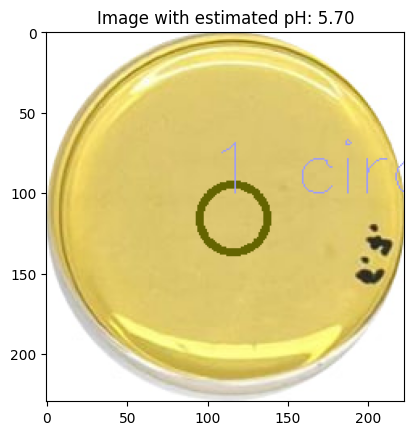

In [10]:
if circle_coords is not None:
    circle_x, circle_y, circle_radius = circle_coords
    # Получение цвета пикселя в центре круга
    circle_center_color = image_with_circle[int(circle_y), int(circle_x)]

    # Поиск ближайшего значения pH
    distances = np.linalg.norm(np.array(list(test_samples_lab.keys())) - circle_center_color[:2], axis=1)
    nearest_index = np.argmin(distances)
    nearest_ph_value = list(test_samples_lab.values())[nearest_index]

    print(f"Estimated pH: {nearest_ph_value:.2f}")

    # Визуализация результатов
    plt.imshow(cv2.cvtColor(image_with_circle, cv2.COLOR_BGR2RGB))
    plt.title(f'Image with estimated pH: {nearest_ph_value:.2f}')
    plt.show()
else:
    print("Circle not found in the image.")

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [27]:
def generate_image(filename, min_dist, edge_threshold, centre_threshold, min_radius, max_radius):
    src = cv2.imread(cv2.samples.findFile(filename), cv2.IMREAD_COLOR)
    gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
    gray = cv2.medianBlur(gray, 5)
    circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, min_dist,
                              param1=edge_threshold, param2=centre_threshold,
                              minRadius=min_radius, maxRadius=max_radius)
    circle_coords = None
    if circles is not None:
        circles = np.uint16(np.around(circles))

        # Найти самый большой круг
        max_radius = 0
        for i in circles[0, :]:
            if i[2] > max_radius:
                max_radius = i[2]
                circle_coords = (i[0], i[1], i[2])

        # Нарисовать только центр круга (как и раньше)
        if circle_coords is not None:
            center = (int(circle_coords[0]), int(circle_coords[1]))
            radius = int(circle_coords[2] * 0.2)  # Уменьшить радиус круга до 20% от оригинального
            cv2.circle(src, center, radius, (0, 100, 100), 3)

    text_loc = (100, 100)
    inverted_color = (int(255 - src[text_loc][0]), int(255 - src[text_loc][1]), int(255 - src[text_loc][2]))
    cv2.putText(src, "{} circles".format(len(circles[0])), text_loc, cv2.FONT_HERSHEY_SIMPLEX, 1.5, inverted_color)

    return src, circle_coords


In [28]:
def gray_world_balance(image):
    avg_bgr = np.mean(image, axis=(0, 1))
    gain = np.mean(avg_bgr) / avg_bgr
    white_balanced_img = (image * gain).clip(0, 255).astype(np.uint8)
    return white_balanced_img

In [29]:
def convert_to_lab_and_normalize(image):
    lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)
    l, a, b = cv2.split(lab_image)
    l[:] = 50
    normalized_lab = cv2.merge([l, a, b])
    return cv2.cvtColor(normalized_lab, cv2.COLOR_Lab2BGR)

In [30]:
def apply_clahe(image):
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    lab[:, :, 0] = clahe.apply(lab[:, :, 0])
    return cv2.cvtColor(lab, cv2.COLOR_Lab2BGR)

In [31]:
# Словарь с данными (не используем для гистограмм, но оставим для совместимости)
test_samples_lab = {
    (216, 179): 8.0,
    (172, 152): 7.7,
    (171, 161): 7.5,
    (163, 183): 7.2,
    (192, 205): 6.9,
    (150, 195): 6.5,
    (181, 215): 6.3,
    (118, 188): 6.0,
    (114, 203): 5.7,
}

In [32]:
def plot_color_histograms(image, circle_coords, filename):
    if circle_coords is None:
        print(f"Circle not found in the image: {filename}")
        return

    circle_x, circle_y, circle_radius = circle_coords
    center = (int(circle_x), int(circle_y))
    radius = int(circle_radius * 0.2) # Используем тот же радиус для центральной области

    # Создаем маску для центрального круга
    mask = np.zeros(image.shape[:2], dtype="uint8")
    cv2.circle(mask, center, radius, 255, -1) # -1 для заполнения круга

    # Применяем маску к исходному изображению
    masked_image = cv2.bitwise_and(image, image, mask=mask)

    # Извлекаем каналы B, G, R
    b, g, r = cv2.split(masked_image)

    # Вычисляем гистограммы
    hist_b = cv2.calcHist([b], [0], None, [256], [0, 256])
    hist_g = cv2.calcHist([g], [0], None, [256], [0, 256])
    hist_r = cv2.calcHist([r], [0], None, [256], [0, 256])

    # Визуализация гистограмм
    plt.figure(figsize=(10, 6))
    plt.subplot(2, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f'Original Image: {filename}')
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
    plt.title(f'Center Region: {filename}')
    plt.axis('off')

    plt.subplot(2, 2, 3)
    plt.plot(hist_b, color='blue', label='Blue')
    plt.plot(hist_g, color='green', label='Green')
    plt.plot(hist_r, color='red', label='Red')
    plt.title(f'Color Histograms: {filename}')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.legend()

    plt.tight_layout()
    plt.show()


In [33]:
# Список путей к изображениям с одинаковой кислотностью
image_paths = ['6.0 АЙ.png', '6.0.png']


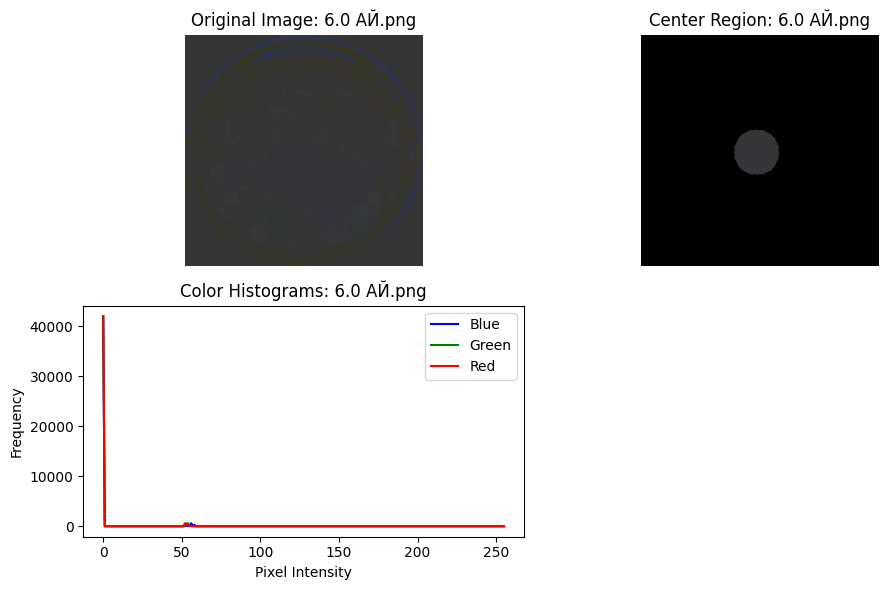

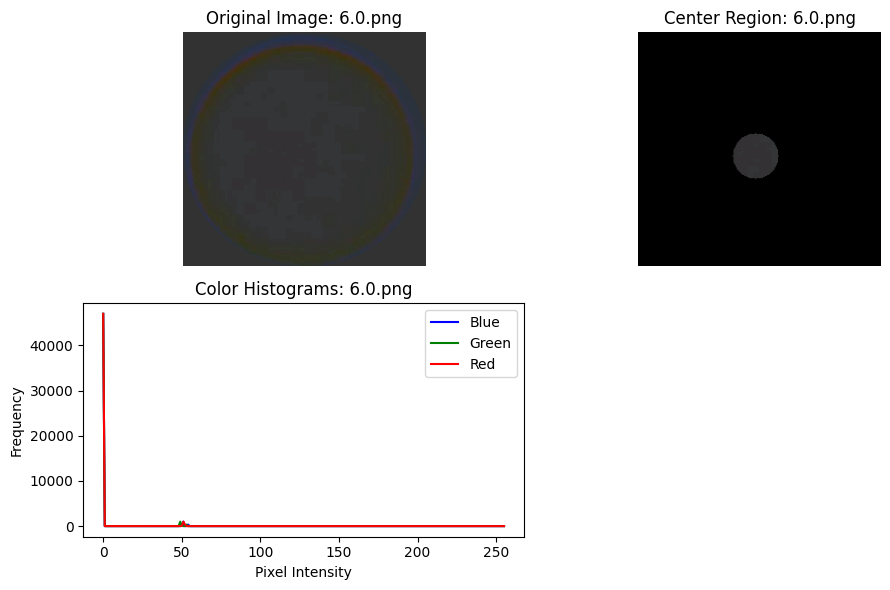

In [34]:
for image_path in image_paths:
    # Загрузка изображения
    image = cv2.imread(image_path)

    # Применение предобработки
    white_balanced_image = gray_world_balance(image)
    lab_normalized_image = convert_to_lab_and_normalize(white_balanced_image)
    final_image = apply_clahe(lab_normalized_image)

    # Получение изображения с выделенным центром круга и его координатами
    image_with_circle, circle_coords = generate_image(image_path, min_dist=50, edge_threshold=50, centre_threshold=50, min_radius=0, max_radius=0)

    # Вывод гистограмм
    plot_color_histograms(final_image, circle_coords, image_path)

In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt



In [36]:
def extract_center_circle(image, circle_coords):
    """
    Извлекает центральную часть чашки Петри (определяемую кругом) из изображения.
    """
    if circle_coords is None:
        raise ValueError("Circle coordinates not found!")

    x, y, radius = circle_coords
    mask = np.zeros(image.shape[:2], dtype=np.uint8)
    cv2.circle(mask, (x, y), radius, 255, -1)  # Создаем маску с кругом
    extracted = cv2.bitwise_and(image, image, mask=mask)  # Применяем маску к изображению
    return extracted



In [37]:
def compute_histograms(image, mask=None):
    """
    Вычисляет гистограммы для каждого канала BGR на изображении.
    """
    histograms = {}
    colors = ('b', 'g', 'r')
    for i, color in enumerate(colors):
        hist = cv2.calcHist([image], [i], mask, [256], [0, 256])
        histograms[color] = hist
    return histograms



In [38]:
def plot_histograms(histograms, title):
    """
    Строит гистограммы для каждого канала.
    """
    plt.figure(figsize=(10, 6))
    for color, hist in histograms.items():
        plt.plot(hist, color=color)
        plt.xlim([0, 256])
    plt.title(title, fontsize=14)
    plt.xlabel('Intensity Value', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.legend(['Blue', 'Green', 'Red'])
    plt.grid()
    plt.show()



In [39]:
# Список путей к изображениям с одинаковой кислотностью
image_paths = ['6.0 АЙ.png', '6.0.png']


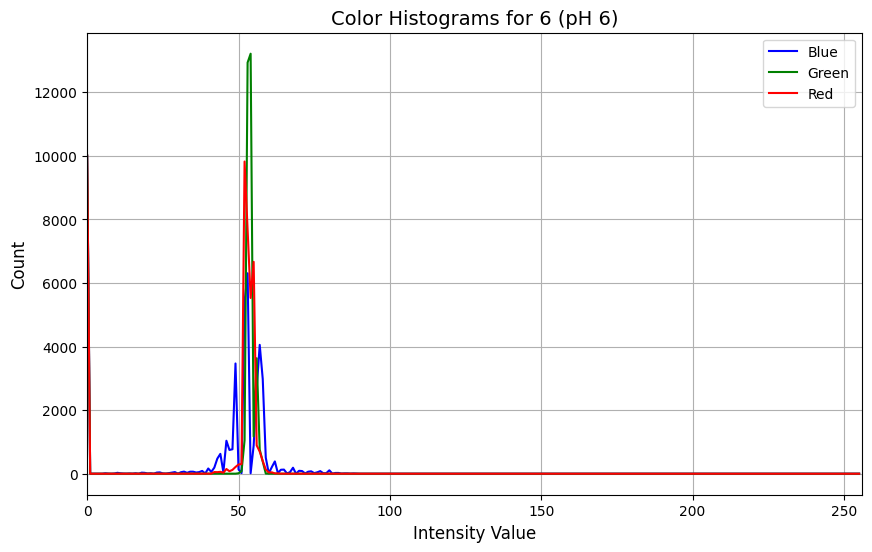

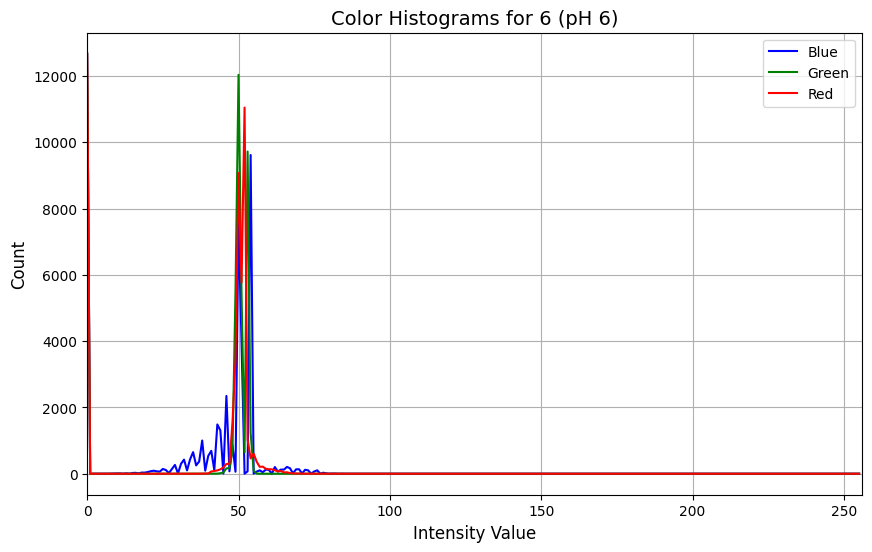

In [40]:
for image_path in image_paths:
    # Загрузка изображения
    image = cv2.imread(image_path)

    # Предобработка изображения (баланс белого, CLAHE и т.д.)
    white_balanced_image = gray_world_balance(image)
    lab_normalized_image = convert_to_lab_and_normalize(white_balanced_image)
    final_image = apply_clahe(lab_normalized_image)

    # Получение координат круга
    _, circle_coords = generate_image(image_path, min_dist=50, edge_threshold=50, centre_threshold=50, min_radius=0, max_radius=0)

    if circle_coords is not None:
        # Извлечение центральной части изображения
        center_circle = extract_center_circle(final_image, circle_coords)

        # Вычисление гистограмм
        histograms = compute_histograms(center_circle)

        # Построение гистограмм
        title = f"Color Histograms for {image_path.split('.')[0]} (pH {image_path.split('.')[0]})"
        plot_histograms(histograms, title)
    else:
        print(f"Circle not found in {image_path}")